In [1]:
%reset -f

In [2]:
%connect_info

{
  "shell_port": 41199,
  "iopub_port": 42387,
  "stdin_port": 49033,
  "control_port": 50367,
  "hb_port": 59095,
  "ip": "127.0.0.1",
  "key": "d755f139-be5a28201c1c039cdce1949c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-1f9fd0a1-1d3b-46e8-be93-0dfd176096fb.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import cbor
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import os
import itertools

In [4]:
path = '../Data_for_Tests/DataSet_01/ai-sense-1st-run-export_initial_training/'

files_list = os.listdir(path)
files_list.sort()

In [5]:
files_info_df = pd.DataFrame(
                    [ item1.split("_") for item1 in files_list],
                    columns=["Date", "Sample", "Condition", "Time_n_Add"])
files_info_df.head(3)

,Date,Sample,Condition,Time_n_Add
0,07Dec21,air,cold,1600.2m7auch7.ingestion-867b55f7c9-7zpp7.cbor
1,07Dec21,air,cold,1600.2m7av77e.ingestion-867b55f7c9-rxq48.cbor
2,07Dec21,air,cold,1600.2m7avvg1.ingestion-867b55f7c9-t6dmw.cbor


In [6]:
GGSdata_df = pd.DataFrame(columns=files_info_df.Condition.unique(), 
                       index=files_info_df.Sample.unique())
GGSdata_df

,cold,humid,normal
air,NaN,NaN,NaN
beer,NaN,NaN,NaN
bread,NaN,NaN,NaN
carrot,NaN,NaN,NaN
coffee,NaN,NaN,NaN
orange,NaN,NaN,NaN
potato,NaN,NaN,NaN
wheatbread,NaN,NaN,NaN
wine,NaN,NaN,NaN


In [7]:
for comboCondSamp in itertools.product(GGSdata_df.columns, GGSdata_df.index):
    files_flist = files_info_df.loc[files_info_df["Sample"].isin(comboCondSamp) & 
                      files_info_df["Condition"].isin(comboCondSamp)]
    dataCondSamp = []
    for fileNidx, fileNseries in files_flist.iterrows():
        fileN = "_".join(fileNseries.values)
        if fileN == "07Dec21_air_normal_1430.2m76i63k.ingestion-867b55f7c9-t6dmw.cbor": continue;
        path_file = path + fileN
        f_01 = open(path_file, 'rb')
        obj = cbor.load(f_01)    
        d_01 = obj['payload']['values']
        dataCondSamp += d_01
    GGSdata_df.loc[comboCondSamp[1],comboCondSamp[0]] = dataCondSamp   

In [8]:
## ================================================
## Final dataframe with combined data from files
## ================================================
GGSdata_df

,cold,humid,normal
air,"[[350.0, 73.0, 282.0, 76.0], [350.0, 73.0, 282...","[[553.0, 127.0, 446.0, 138.0], [554.0, 128.0, ...","[[641.0, 285.0, 587.0, 143.0], [641.0, 285.0, ..."
beer,"[[730.0, 536.0, 730.0, 715.0], [730.0, 537.0, ...","[[681.0, 590.0, 698.0, 489.0], [680.0, 590.0, ...","[[710.0, 654.0, 746.0, 678.0], [711.0, 654.0, ..."
bread,"[[825.0, 848.0, 734.0, 468.0], [826.0, 848.0, ...","[[745.0, 750.0, 648.0, 363.0], [745.0, 749.0, ...","[[784.0, 799.0, 696.0, 374.0], [783.0, 797.0, ..."
carrot,"[[839.0, 555.0, 732.0, 335.0], [840.0, 555.0, ...","[[859.0, 457.0, 782.0, 391.0], [860.0, 456.0, ...","[[841.0, 436.0, 753.0, 386.0], [841.0, 437.0, ..."
coffee,"[[927.0, 982.0, 848.0, 790.0], [927.0, 982.0, ...","[[930.0, 965.0, 835.0, 736.0], [931.0, 965.0, ...","[[927.0, 950.0, 860.0, 737.0], [927.0, 951.0, ..."
orange,"[[993.0, 968.0, 969.0, 1000.0], [992.0, 969.0,...","[[982.0, 939.0, 960.0, 990.0], [982.0, 938.0, ...","[[987.0, 948.0, 972.0, 997.0], [987.0, 949.0, ..."
potato,"[[624.0, 197.0, 535.0, 141.0], [624.0, 198.0, ...","[[739.0, 252.0, 641.0, 191.0], [740.0, 252.0, ...","[[842.0, 524.0, 767.0, 310.0], [842.0, 524.0, ..."
wheatbread,"[[738.0, 584.0, 677.0, 422.0], [738.0, 584.0, ...","[[720.0, 698.0, 665.0, 378.0], [720.0, 699.0, ...","[[743.0, 754.0, 687.0, 395.0], [743.0, 753.0, ..."
wine,"[[841.0, 642.0, 801.0, 588.0], [843.0, 642.0, ...","[[777.0, 756.0, 779.0, 683.0], [776.0, 756.0, ...","[[732.0, 679.0, 775.0, 667.0], [732.0, 679.0, ..."


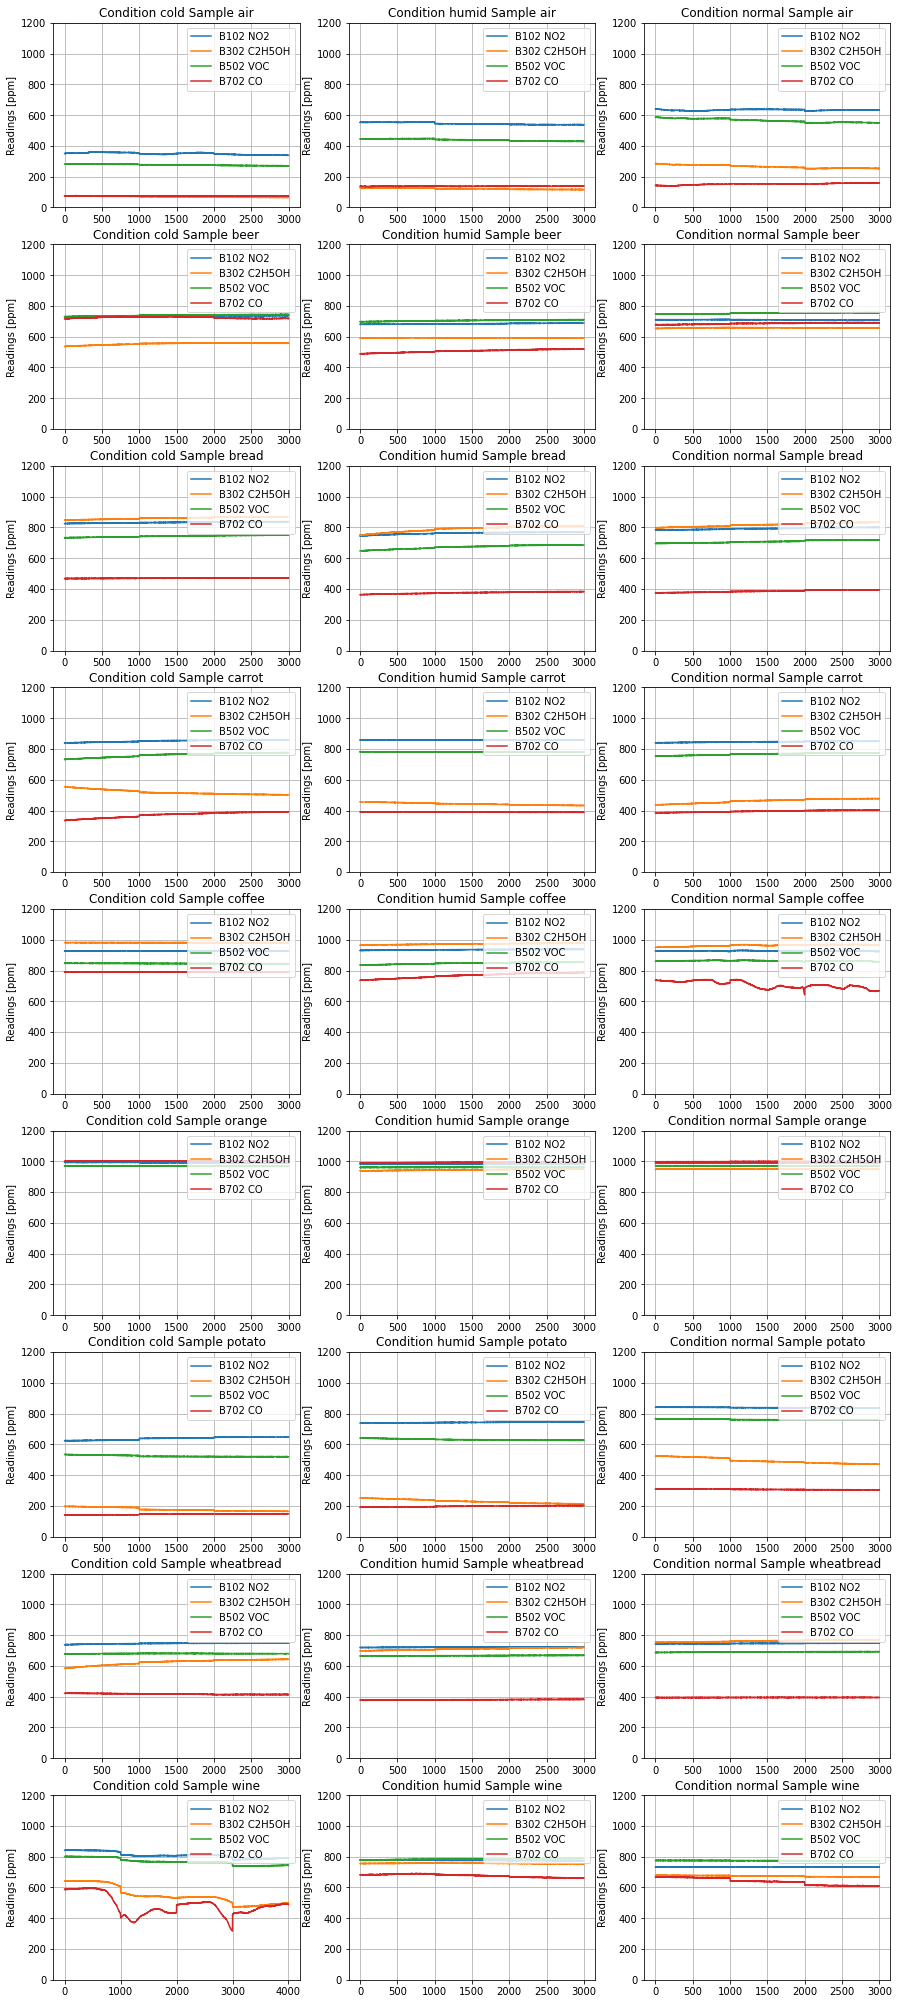

In [9]:
plt.figure(figsize=(15, 9*4))
cc1 = -2
for comboCondSamp in itertools.product(GGSdata_df.columns, GGSdata_df.index):
    cc1 +=3
    plt.subplot(len(GGSdata_df.index), len(GGSdata_df.columns), cc1)
    data2plot = np.array(GGSdata_df.loc[comboCondSamp[1], comboCondSamp[0]])
    plt.plot(data2plot[:,0], '-', label="B102 NO2", color="#1f77b4")
    plt.plot(data2plot[:,1], '-', label="B302 C2H5OH", color="#ff7f0e")
    plt.plot(data2plot[:,2], '-', label="B502 VOC", color="#2ca02c")
    plt.plot(data2plot[:,3], '-', label="B702 CO", color="#d62728")
    plt.legend(loc="upper right")
    plt.title(f"Condition {comboCondSamp[0]} Sample {comboCondSamp[1]}")
    # plt.xlabel("measurement N")
    plt.ylabel("Readings [ppm]")
    plt.ylim([0,1200])
    plt.grid(True)
    if cc1 == 25:
        cc1 = -1
    elif cc1 == 26:
        cc1 = 0

In [10]:
## ================================================
## How to save final dataframe to a file
## ================================================

# GGSdata_df.to_pickle('/home/igor_trix/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project'+\
# '/Measurements_n_Tests/DataSet_Run1/GGSdata_df_Run1_initial.pickle')